## There is an economy of a country far, far away from the books logic
## we found a reality with not only one but multiples exchange rates 
## for the local currency.
## This reality is a multiverse of rates, breaking the law of one price
##  Let see what this reality looks like


In [1]:
import pandas as pd
import yfinance as yahoo
import datetime as dt
import matplotlib.pyplot as plt

start, end = dt.date(2020,1,1), dt.date(2020,12,31)

# Lets take a look to Exchange Rates of Argentina during 2020
# 1) Obtain Official rate with capital controls (Peso)
# 2) Cedears Rates (equivalent to US ADRs)
# 3) Argentina ADRs in USA

In [2]:
stocks = ['AAPL.BA', 'AUY.BA', 'AXP.BA', 'BA.BA', 'BABA.BA', 'BBD.BA', 'BBV.BA', 'BP.BA',
          'C.BA', 'CSCO.BA', 'CVX.BA', 'DESP.BA', 'DISN.BA', 'ERJ.BA', 'FB.BA',
          'GE.BA', 'GOLD.BA', 'HMY.BA', 'INTC.BA', 'ITUB.BA',
          'JNJ.BA', 'JPM.BA', 'KO.BA', 'MSFT.BA', 'NFLX.BA',
          'NOKA.BA', 'OGZD.BA', 'PBR.BA', 'PFE.BA', 'QCOM.BA',
          'T.BA', 'TEN.BA', 'TXR.BA', 'VALE.BA', 'WFC.BA',
          'WMT.BA', 'X.BA', 'XOM.BA']

ratios = [10, 1, 5, 3, 9, 1, 1, 5, 3, 5, 8, 1,
          4, 1, 8, 1, 1, 1, 5, 1, 5, 5, 5, 5, 16, 1,
          2, 1, 2, 11, 3, 1, 2, 2, 5, 3, 3, 5]

cedears = yahoo.download(stocks, start=start,end=end, interval="60m")['Adj Close'].fillna(method='ffill')

cedears = cedears * ratios  # get stocks prices according to what you have to paid

topba = [s.replace('.BA', 'BA') for s in stocks]

cedears.columns = topba

forex = ['AAPL', 'AUY', 'AXP', 'BA', 'BABA', 'BBD', 'BBVA', 'BP', 'C', 'CSCO', 'CVX', 'DESP', 'DIS', 'ERJ',
         'FB', 'GE', 'GOLD', 'HMY', 'INTC', 'ITUB', 'JNJ', 'JPM', 'KO', 'MSFT', 'NFLX', 'NOK', 'OGZPY',
         'PBR', 'PFE', 'QCOM', 'T', 'TS', 'TX', 'VALE', 'WFC', 'WMT', 'X', 'XOM']

df = yahoo.download(forex,start=start,end=end, interval="60m")['Adj Close'].fillna(method='ffill')

mervalba = ['ARS=X', 'BMA', 'BMA.BA', 'CEPU', 'CEPU.BA', 'CRES.BA', 'CRESY', 'EDN', 'EDN.BA',
            'GGAL', 'GGAL.BA', 'IRS', 'IRSA.BA', 'LOMA', 'LOMA.BA', 'PAM', 'PAMP.BA',
            'SUPV', 'SUPV.BA', 'TECO2.BA', 'TEO', 'TGS', 'TGSU2.BA', 'YPF',
            'YPFD.BA']

merval = yahoo.download(tickers=mervalba, start=start,end=end, interval="60m")['Adj Close'].fillna(method='ffill')

top = list(merval.columns)
topmerval = [t.replace('.BA', 'BA') for t in top]

merval.columns = topmerval

cable = pd.DataFrame(data=None)

cable['BMA'] = (merval.BMABA / merval.BMA) * 10
cable['CEPU'] = (merval.CEPUBA / merval.CEPU) * 10
cable['CRES'] = (merval.CRESBA / merval.CRESY) * 10
cable['EDN'] = (merval.EDNBA / merval.EDN) * 20
cable['GGAL'] = (merval.GGALBA / merval.GGAL) * 10
cable['IRSA'] = (merval.IRSABA / merval.IRS) * 10
cable['LOMA'] = (merval.LOMABA / merval.LOMA) * 5
cable['PAMP'] = (merval.PAMPBA / merval.PAM) * 25
cable['SUPV'] = (merval.SUPVBA / merval.SUPV) * 5
cable['TECO2'] = (merval.TECO2BA / merval.TEO) * 5
cable['TGSU2'] = (merval.TGSU2BA / merval.TGS) * 5
cable['YPF'] = (merval.YPFDBA / merval.YPF)

mediacable = pd.DataFrame(index=cable.index)
mediacable['CableAdrs'] = cable.T.median()

df = df.tail(len(cedears))

tc = cedears.div(df.values)
tc.columns = topba

mediaced = pd.DataFrame(index=tc.index)
mediaced['CableCedears'] = tc.T.median()

dolar = pd.DataFrame(index=merval.index)
dolar['solidario+30+35'] = merval.iloc[:, 0] * 1.30 * 1.35

[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  25 of 25 completed


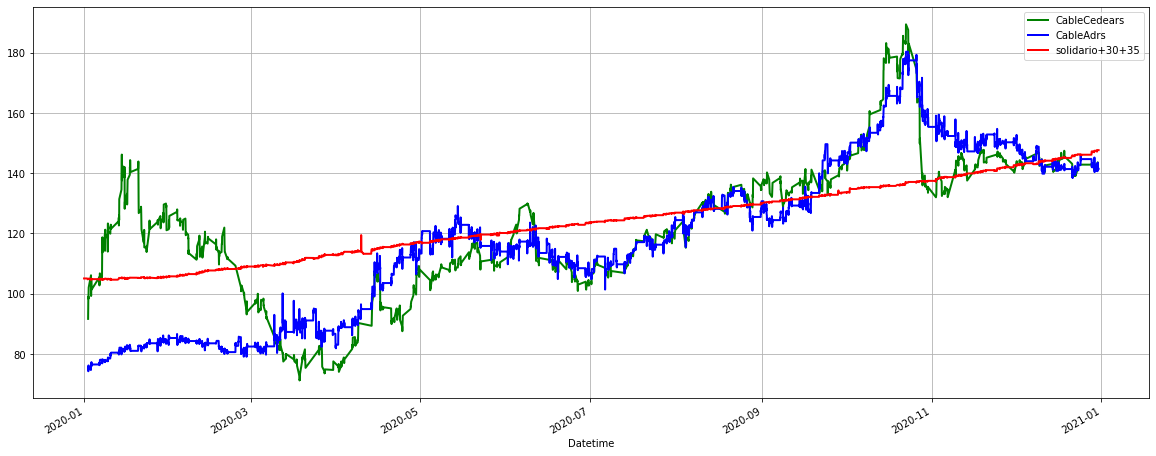

In [3]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111)
mediaced.fillna(method='ffill').plot(ax=ax1, color='g', lw=2., legend=True)
mediacable.fillna(method='ffill').plot(ax=ax1, color='b', lw=2., legend=True)
dolar.plot(ax=ax1, color='r', lw=2., legend=True)
ax1.grid()
plt.show()

# Obtained Exchange Rates of Argentina
# Lets get Merval's Stock Exchange Adjusted to Cedears Rate
# So we can compare the return in the same currency

In [4]:
merval = yahoo.download(tickers="BMA.BA  CRES.BA "
                              "EDN.BA GGAL.BA IRSA.BA LOMA.BA "
                              "PAMP.BA SUPV.BA TECO2.BA TGSU2.BA YPFD.BA  ", start=start,end=end, interval="60m")['Adj Close'].fillna(method="ffill")

merval.columns = [i.replace('.BA','') for i in merval.columns] 

[*********************100%***********************]  11 of 11 completed


# Return in Pesos, official first

<AxesSubplot:xlabel='Datetime'>

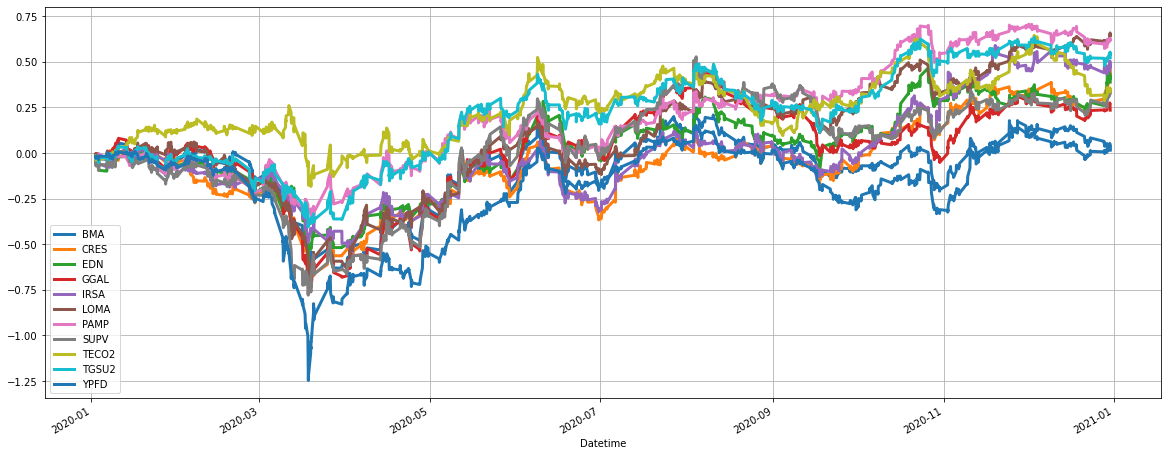

In [5]:
merval.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)

# Mean Return

In [6]:
mervalMean = pd.DataFrame(merval.T.mean().values,columns=['MervalMean'],index=merval.index)

<AxesSubplot:xlabel='Datetime'>

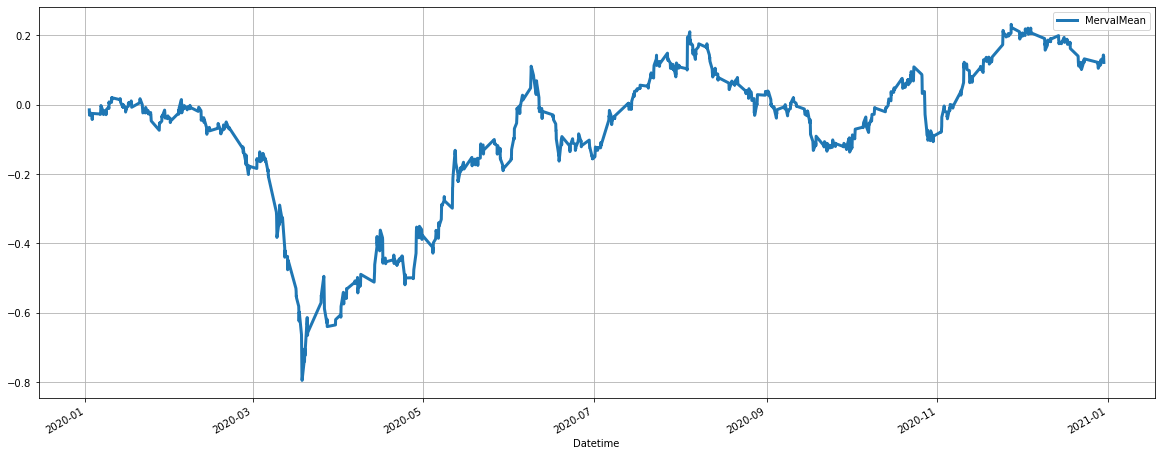

In [7]:
mervalMean.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)

# Merval Return Adjusted by Cedears Exchange Rate

<AxesSubplot:xlabel='Datetime'>

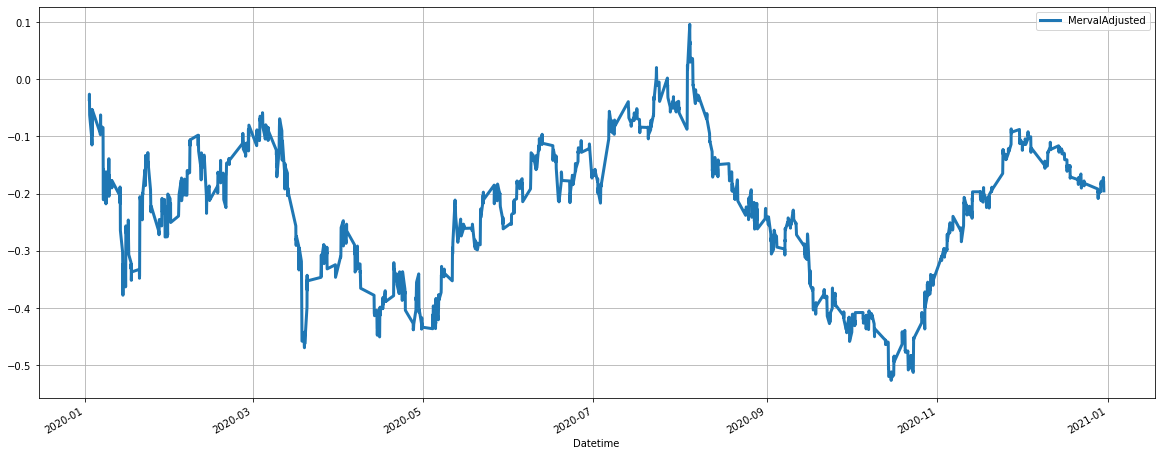

In [8]:
mediaced = mediaced.tail(len(merval))
mervalAdj = pd.DataFrame(data=(mervalMean['MervalMean'] / mediaced['CableCedears']), columns=['MervalAdjusted'],index=merval.index)
mervalAdj.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)

# We obtain that in Pesos, Merval end up almost 20% (rounded) up
# But Adjusting the return, the story reverse to almot 20% down

# Compare versus the return of an American Porfolio
# with stocks available in United States + their replicate
# via the CEDEARS figure (ADRs)

In [9]:
simulation = pd.read_csv('carteraSimulacro.csv')
simulation

,Unnamed: 0,nominal
0,AAPL.BA,25.0
1,AMZN.BA,43.0
2,AUY.BA,64.0
3,INTC.BA,5.0
4,MELI.BA,36.0
5,MSFT.BA,3.0
6,NVDA.BA,55.0
7,QCOM.BA,55.0
8,RTX.BA,14.0
9,WMT.BA,13.0


In [10]:
stocklist = list(simulation.iloc[:,0].values)
stocklist = [i.replace('.BA','') for i in stocklist]

df = yahoo.download(stocklist,start=start,end=end,interval="60m")["Adj Close"].fillna(method="ffill")

[*********************100%***********************]  12 of 12 completed


In [11]:
portfolio = pd.DataFrame((df * simulation.nominal.values).T.sum(), columns=['USAreturn'],index=df.index)

Return of american portfolio in 2020 was: USAreturn    0.751626
dtype: float64


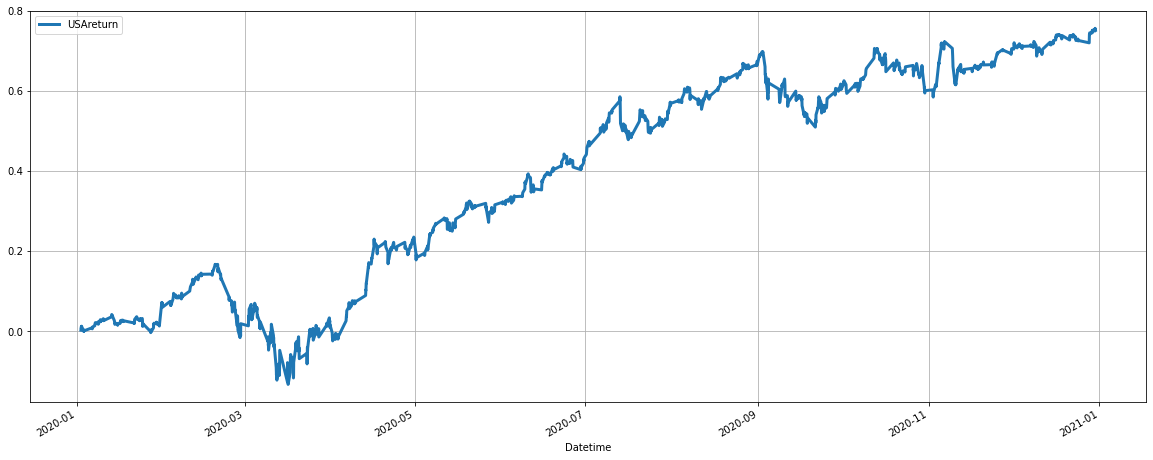

In [12]:
portfolio.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)
print(f'Return of american portfolio in 2020 was: {portfolio.pct_change().sum()}')

# Lets sum everything in one and see them together

In [13]:
CedearRate = mediaced.groupby([mediaced.index.year,mediaced.index.month,mediaced.index.day]).mean()
MervalAdj = mervalAdj.groupby([mervalAdj.index.year,mervalAdj.index.month,mervalAdj.index.day]).mean()
PortfolioR = portfolio.groupby([portfolio.index.year,portfolio.index.month,portfolio.index.day]).mean()

In [14]:
CedearRate = CedearRate.tail(len(MervalAdj))
PortfolioR = PortfolioR.tail(len(MervalAdj))

In [15]:
Spectrum = pd.DataFrame(CedearRate['CableCedears'].values,columns=['ArgentinaDollar'],index=CedearRate.index)
Spectrum['USAreturn'] = PortfolioR['USAreturn'].values
Spectrum['MervalAdj'] = MervalAdj['MervalAdjusted'].values
Spectrum['Cedear (USAreturn X Dollar)'] = Spectrum['USAreturn'] * Spectrum['ArgentinaDollar']

In [16]:
ArgentinaPeso = pd.DataFrame(yahoo.download("ARS=X",start=start,end=end,)["Adj Close"].fillna(method="ffill"))
ArgentinaPeso = (ArgentinaPeso*1.30*1.35) # CAPITAL CONTROL + SOLIDARiTy TAX
ArgentinaPeso = ArgentinaPeso.tail(len(Spectrum))

[*********************100%***********************]  1 of 1 completed


In [17]:
Spectrum['Solidarity+30+35'] = (1.0 / ArgentinaPeso['Adj Close'].values)

<AxesSubplot:xlabel='Datetime,Datetime,Datetime'>

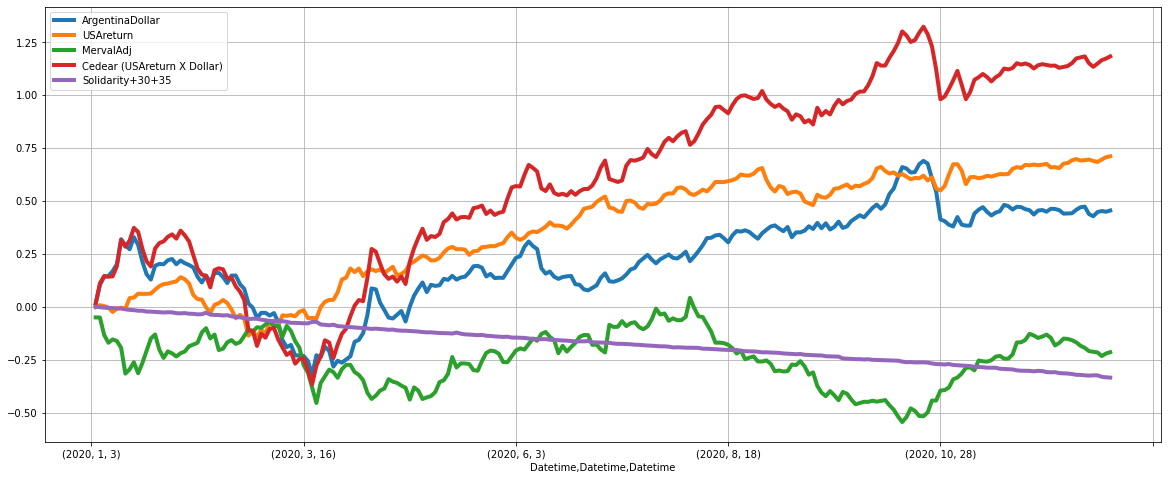

In [18]:
Spectrum.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=4.0)

In [19]:
Spectrum.pct_change().sum()

ArgentinaDollar                0.454851
USAreturn                      0.710952
MervalAdj                     -0.214665
Cedear (USAreturn X Dollar)    1.182954
Solidarity+30+35              -0.334767
dtype: float64

# We obtain that if you decided to safeguard your investment
# in these options, you had obtained:
# Merval Adjusted by Cedears Rate = -21,46% down
# Local Peso = -33,47%
# USA Stock Return = + 71,09%
# Argentina Dollar (keep your dollars) = + 45,48%
# Cedear Return = +118,29%

# Note
## The dollar is under several capital controls and taxes to operate
## The official dollar is not a reference due no one can operate it
## The real dollar is cedear or adr rate that gives us a proxy of what
## the rate should be and a reference to illegal markets to use as anchor

## So the real return of staying in Pesos is equal to having sell your dollars
## at the beginning
## Argentina Dollar = 0,4548% return
## Peso = -0,4548%     (ArgentinaDollar X -1)

# This Story begins when Mauricio Macri started capital control in August 
# 2019 and Alberto Fernandez continue the same policy 
# Going back to Cristina Fernandez de Kirchner measure during 2011-2015
# The result is the following

[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Datetime'>

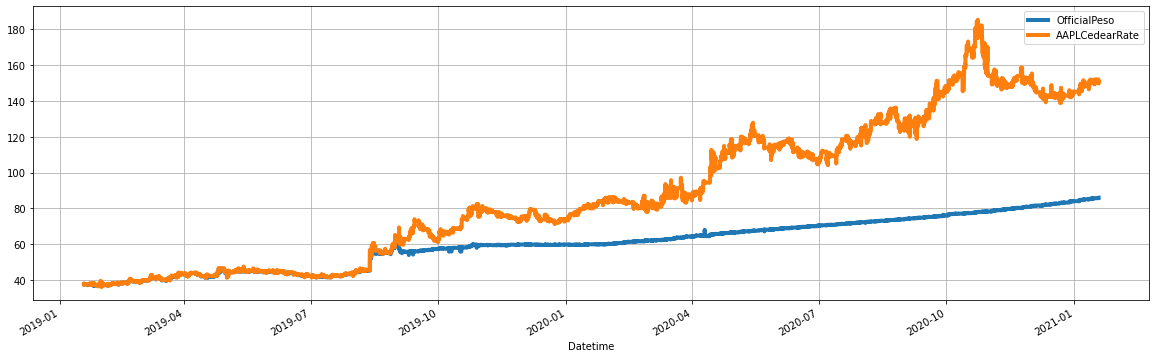

In [20]:
# Apple Cedear Rate and Official Peso

data = yahoo.download("AAPL.BA ARS=X AAPL", period="2y",interval="60m")['Adj Close'].fillna(method="ffill")

data.columns = [i.replace('.BA','BA') for i in data.columns]
data.columns = [i.replace('=X','') for i in data.columns]

rates = pd.DataFrame(data['ARS'].values,columns=['OfficialPeso'],index=data.index)
rates['AAPLCedearRate'] = (data['AAPLBA'] / data['AAPL']) * 10 # 10 ratio of convertion 

rates.plot(figsize=(20,6),grid=True,lw=4.0)



<AxesSubplot:xlabel='Datetime'>

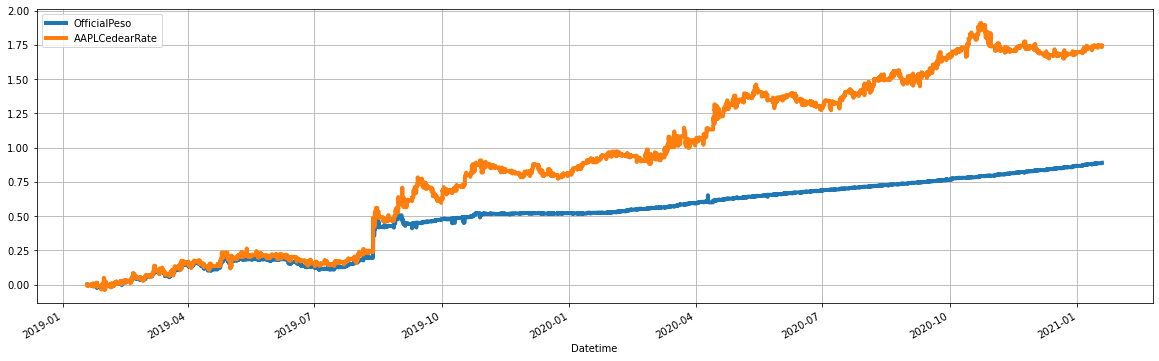

In [21]:
rates.pct_change().cumsum().plot(figsize=(20,6),grid=True,lw=4.0)

<AxesSubplot:xlabel='Datetime'>

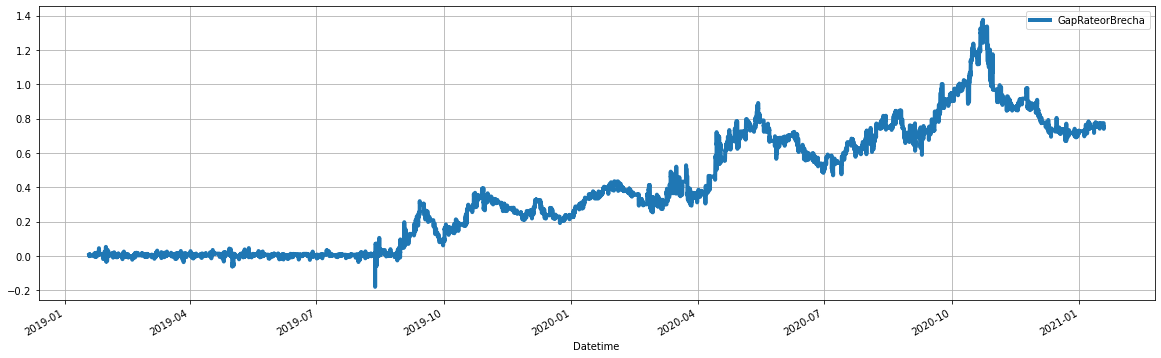

In [22]:
Gap = pd.DataFrame((rates['AAPLCedearRate'] / rates['OfficialPeso']),columns=['GapRateorBrecha'], index=rates.index)
Gap = Gap - 1.0 # to only see percentage difference
Gap.plot(figsize=(20,6),grid=True,lw=4.0)

# Conclusion:
# The multiverse rates forbids people to plan their decisions
# as they cannot compare alternatives
# the local currency does not qualify as a currency 
# Economy Minister Martin Guzman sustained when defending the budget plan
# that the Peso was not a trustworthy currency and was excessively volatile
# People cannot freely trade the currency, so the prices of the economy 
# are distorted and do not serve as a reference of measure
# it does not serves as a mental anchor, as everyone thinks in dollars term